In [1]:
import ipynb
from ipynb.fs.full.quantum_helpers import draw_statevector, draw_unitary, aer_get_counts, aer_plot_histogram, list_backends
from qiskit import QuantumCircuit
oracle = QuantumCircuit(2)
oracle.cz(0,1)  # invert phase of |11>
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [2]:
draw_statevector(oracle)

<IPython.core.display.Latex object>

In [3]:
draw_unitary(oracle)

<IPython.core.display.Latex object>

In [4]:
diffuser = QuantumCircuit(2)
diffuser.h([0, 1])
diffuser.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [5]:
diffuser.x([0,1])
diffuser.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ X ├
     ├───┤├───┤
q_1: ┤ H ├┤ X ├
     └───┘└───┘

In [6]:
diffuser.cz(0,1)
diffuser.x([0,1])
diffuser.h([0,1])
diffuser.draw()

┌───┐┌───┐   ┌───┐┌───┐
q_0: ┤ H ├┤ X ├─■─┤ X ├┤ H ├
     ├───┤├───┤ │ ├───┤├───┤
q_1: ┤ H ├┤ X ├─■─┤ X ├┤ H ├
     └───┘└───┘   └───┘└───┘

In [7]:
grover = QuantumCircuit(2)
grover.h([0,1])  # initialize |s>
grover = grover.compose(oracle)
grover = grover.compose(diffuser)
grover.measure_all()
grover.draw()

┌───┐   ┌───┐┌───┐   ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░─┤M├───
        ├───┤ │ ├───┤├───┤ │ ├───┤├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├─■─┤ H ├┤ X ├─■─┤ X ├┤ H ├─░──╫─┤M├
        └───┘   └───┘└───┘   └───┘└───┘ ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

In [8]:
aer_get_counts(grover)

{'11': 1024}

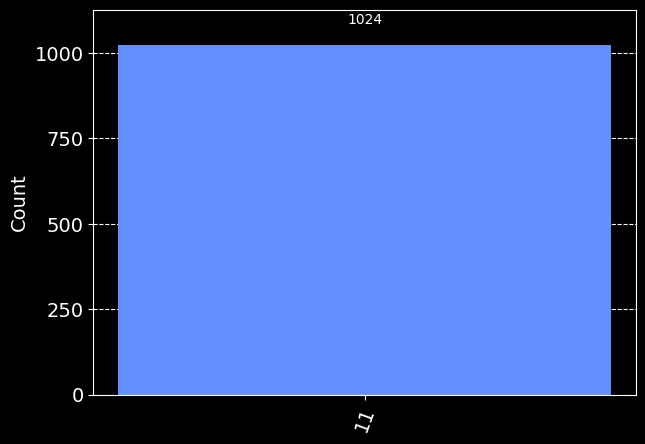

In [9]:
aer_plot_histogram(grover)